# Set Parameter
- Attention = [None, Luong]
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 100K
- Single
- Cype = 3
- Deduplication

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
character_accuracy = []
sentance_accuracy = []

In [4]:
train_path = "data/palindrome_dedup/K100_single_Ctype3/data_train.txt"
dev_path = "data/palindrome_dedup/K100_single_Ctype3/data_test.txt"

src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()
    
optimizer = "Adam"
hidden_size = 50
bidirectional = True

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


# Prepare dataset

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-03-22 16:50:21,720 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


None Att


2019-03-22 16:52:47,852 INFO   Finished epoch 1: Train loss: 15.4100, Dev loss: 14.9288, Accuracy(Character): 0.4681, Accuracy(Word): 0.0000
2019-03-22 16:55:13,750 INFO   Finished epoch 2: Train loss: 5.9752, Dev loss: 14.3955, Accuracy(Character): 0.4775, Accuracy(Word): 0.0000
2019-03-22 16:57:39,959 INFO   Finished epoch 3: Train loss: 4.9030, Dev loss: 26.4834, Accuracy(Character): 0.4730, Accuracy(Word): 0.0000
2019-03-22 17:00:04,194 INFO   Finished epoch 4: Train loss: 4.8842, Dev loss: 39.6796, Accuracy(Character): 0.4799, Accuracy(Word): 0.0002
2019-03-22 17:02:32,140 INFO   Finished epoch 5: Train loss: 5.0734, Dev loss: 58.6401, Accuracy(Character): 0.4790, Accuracy(Word): 0.0003
2019-03-22 17:05:00,119 INFO   Finished epoch 6: Train loss: 4.8948, Dev loss: 47.4522, Accuracy(Character): 0.4740, Accuracy(Word): 0.0000
2019-03-22 17:07:26,486 INFO   Finished epoch 7: Train loss: 4.9773, Dev loss: 55.3852, Accuracy(Character): 0.4788, Accuracy(Word): 0.0000
2019-03-22 17:09:52

2019-03-22 19:13:13,757 INFO   Finished epoch 59: Train loss: 4.8012, Dev loss: 498.7499, Accuracy(Character): 0.4739, Accuracy(Word): 0.0000
2019-03-22 19:15:37,755 INFO   Finished epoch 60: Train loss: 5.1075, Dev loss: 324.4475, Accuracy(Character): 0.4722, Accuracy(Word): 0.0000
2019-03-22 19:18:02,860 INFO   Finished epoch 61: Train loss: 4.0696, Dev loss: 460.3258, Accuracy(Character): 0.4745, Accuracy(Word): 0.0000
2019-03-22 19:20:27,702 INFO   Finished epoch 62: Train loss: 4.1850, Dev loss: 373.2951, Accuracy(Character): 0.4715, Accuracy(Word): 0.0000
2019-03-22 19:22:52,844 INFO   Finished epoch 63: Train loss: 3.7653, Dev loss: 414.6532, Accuracy(Character): 0.4702, Accuracy(Word): 0.0000
2019-03-22 19:25:16,086 INFO   Finished epoch 64: Train loss: 4.8497, Dev loss: 319.4215, Accuracy(Character): 0.4742, Accuracy(Word): 0.0000
2019-03-22 19:27:42,446 INFO   Finished epoch 65: Train loss: 3.5835, Dev loss: 389.3322, Accuracy(Character): 0.4728, Accuracy(Word): 0.0000
2019-0

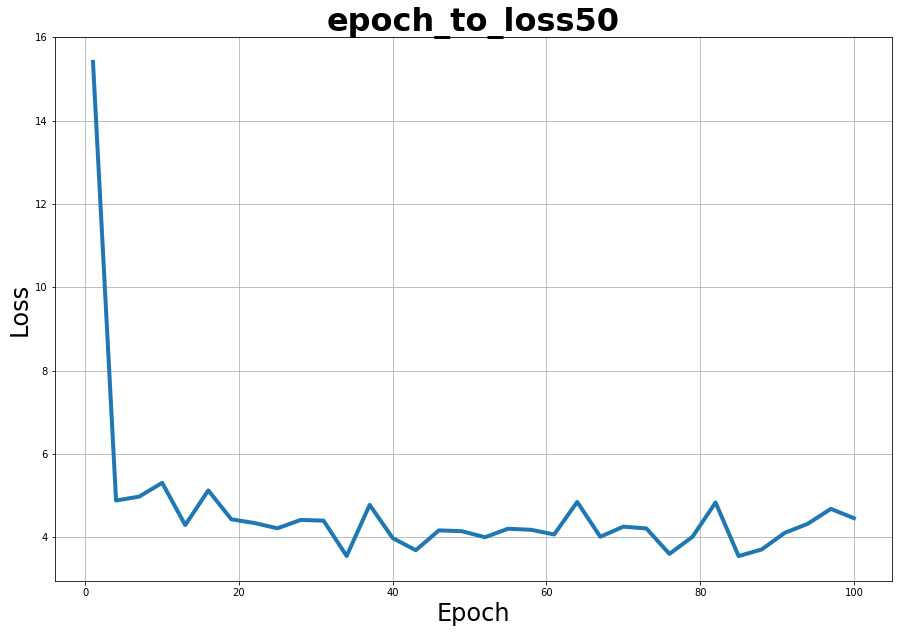

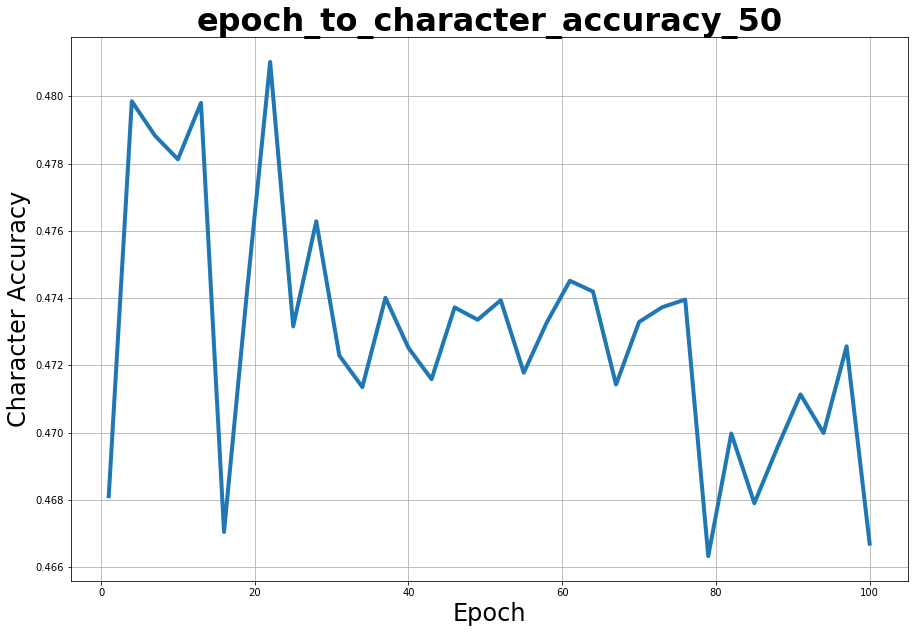

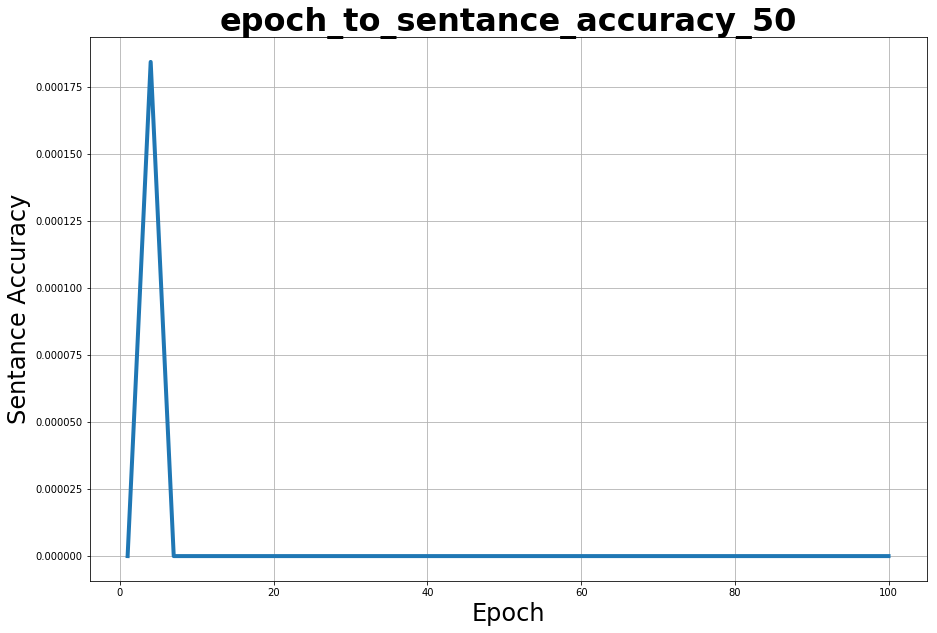

In [5]:
print("None Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention=None, bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="palindrome_dedup_K100_single_Ctype3_parameter/None_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)

torch.save(seq2seq.state_dict(), 'log/pth/palindrome_dedup_K100_single_Ctype3_parameter_no_att_model_save.pth')

2019-03-22 20:52:13,674 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


Luong Att


/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-03-22 20:55:18,980 INFO   Finished epoch 1: Train loss: 14.4155, Dev loss: 13.1989, Accuracy(Character): 0.4192, Accuracy(Word): 0.0000
2019-03-22 20:58:21,246 INFO   Finished epoch 2: Train loss: 6.8286, Dev loss: 19.9670, Accuracy(Character): 0.4838, Accuracy(Word): 0.0000
2019-03-22 21:01:23,024 INFO   Finished epoch 3: Train loss: 5.5537, Dev loss: 15.7724, Accuracy(Character): 0.4862, Accuracy(Word): 0.0000
2019-03-22 21:04:25,278 INFO   Finished epoch 4: Train loss: 4.8652, Dev loss: 22.1745, Accuracy(Character): 0.4795, Accuracy(Word): 0.0000
2019-03-22 21:07:29,604 INFO   Finished epoch 5: Train loss: 4.9774, Dev loss: 28.5935, Accuracy(Character): 0.4804, Accuracy(Word): 0.0076
2019-03-22 21:10:32,000 INFO   Finished epoch 6: Train loss: 5.1

2019-03-22 23:49:37,105 INFO   Finished epoch 58: Train loss: 3.9860, Dev loss: 325.5034, Accuracy(Character): 0.4726, Accuracy(Word): 0.0000
2019-03-22 23:52:39,273 INFO   Finished epoch 59: Train loss: 4.0635, Dev loss: 607.2361, Accuracy(Character): 0.4678, Accuracy(Word): 0.0000
2019-03-22 23:55:41,874 INFO   Finished epoch 60: Train loss: 3.5691, Dev loss: 473.7515, Accuracy(Character): 0.4661, Accuracy(Word): 0.0000
2019-03-22 23:58:44,523 INFO   Finished epoch 61: Train loss: 4.1717, Dev loss: 681.5411, Accuracy(Character): 0.4680, Accuracy(Word): 0.0000
2019-03-23 00:01:47,305 INFO   Finished epoch 62: Train loss: 4.2563, Dev loss: 461.0547, Accuracy(Character): 0.4675, Accuracy(Word): 0.0000
2019-03-23 00:04:51,893 INFO   Finished epoch 63: Train loss: 3.9960, Dev loss: 454.3710, Accuracy(Character): 0.4682, Accuracy(Word): 0.0000
2019-03-23 00:07:54,371 INFO   Finished epoch 64: Train loss: 3.5331, Dev loss: 707.9159, Accuracy(Character): 0.4698, Accuracy(Word): 0.0000
2019-0

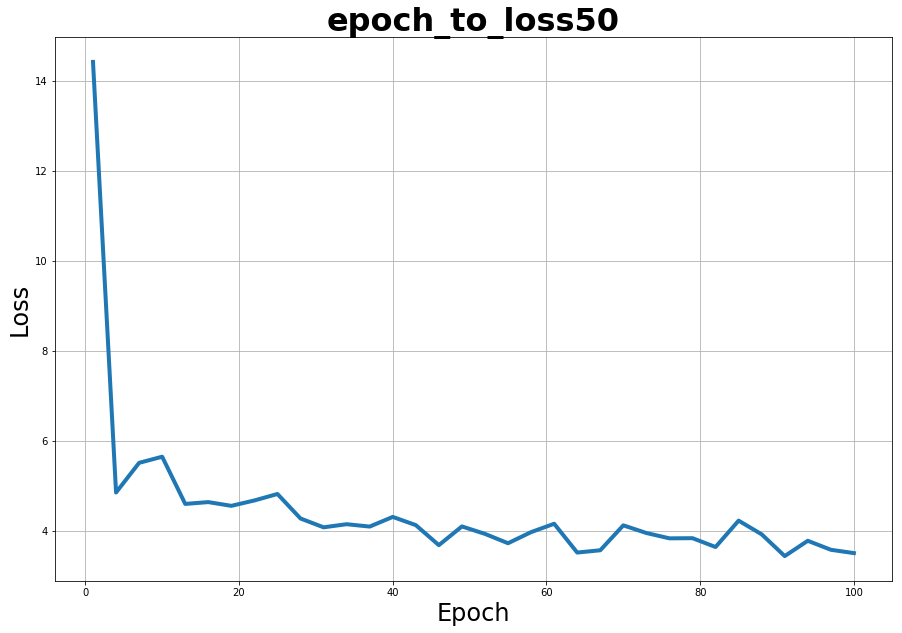

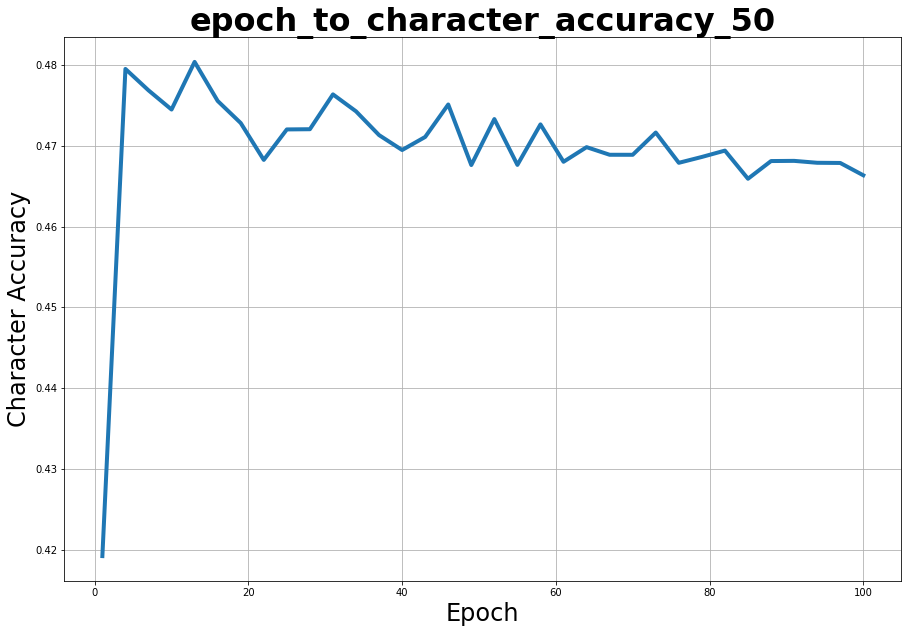

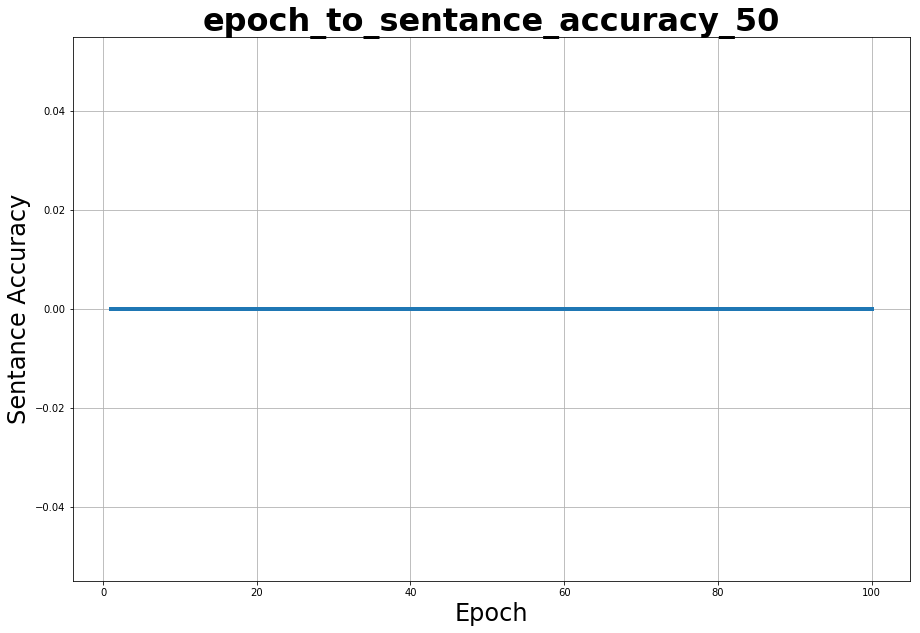

In [6]:
print("Luong Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="palindrome_dedup_K100_single_Ctype3_parameter/Luong_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)

torch.save(seq2seq.state_dict(), 'log/pth/palindrome_dedup_K100_single_Ctype3_parameter_Luong_att_model_save.pth')

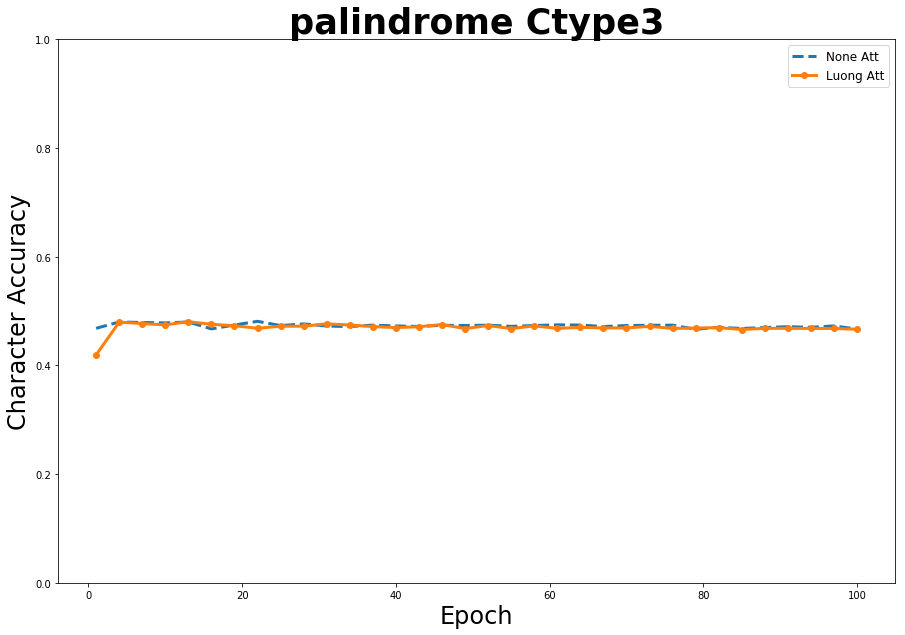

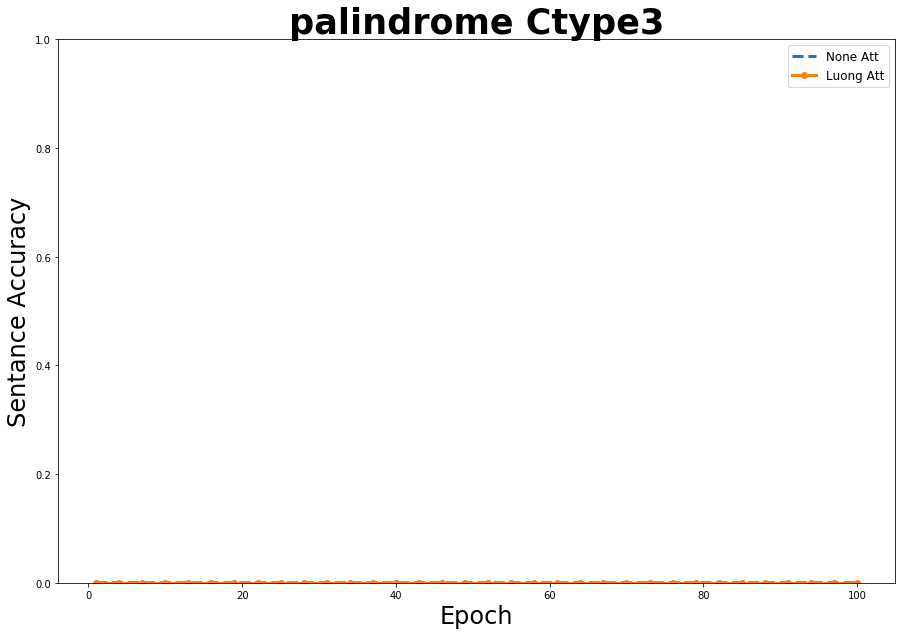

In [7]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], character_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('palindrome Ctype3', fontsize=35, fontweight=560)
plt.savefig('log/plot/palindrome_dedup_K100_single_Ctype3_parameter/epoch_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('palindrome Ctype3', fontsize=35, fontweight=560)
plt.savefig('log/plot/palindrome_dedup_K100_single_Ctype3_parameter/epoch_to_sentance_accuracy.png')

In [8]:
print(character_accuracy[0])
print(character_accuracy[1])

[0.4681135039959251, 0.4774783400466662, 0.4729898060106909, 0.4798552141388822, 0.47904712482011874, 0.47398938568935095, 0.4788364854242325, 0.47740509498400574, 0.47634423839017886, 0.47813036472211395, 0.4780102045212789, 0.4750995510508512, 0.47980782027480784, 0.47756594688631887, 0.47906531640430894, 0.46705025377259946, 0.4791792531684474, 0.47638157901035866, 0.4742249188320237, 0.4800395236102826, 0.47542795701807383, 0.48102522023785016, 0.47689573062668095, 0.47745440375167914, 0.47316071115689856, 0.47074027300780613, 0.4768866348345858, 0.47628774873400936, 0.47477162380952836, 0.47188825771538595, 0.47229517473016613, 0.47707764646858264, 0.4565666352941627, 0.4713573506925728, 0.47515173217392304, 0.4751933813272005, 0.474013321984338, 0.47331773325201376, 0.4706952727732304, 0.4725220908066436, 0.4737390120437862, 0.4739472578101737, 0.4715924051093458, 0.4729203907552284, 0.47047840994064755, 0.4737251289926937, 0.4719409175643575, 0.47252975042103945, 0.4733598611311

In [9]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])

[0.0, 0.0, 0.0, 0.00018430914787737299, 0.00026622432471176097, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.00763859023980668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0478794208597e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0